In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Checking Structure of Dataset

In [3]:
print('Rows:',df.shape[0],'Columns:',df.shape[1])

Rows: 119390 Columns: 32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Handling Missing Values

In [7]:

df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [8]:
df = df.drop('company', axis=1)

In [9]:
df = df.fillna({
    'children' : 0,
    'agent' : 0,
    'country': 'Unknown',
})


In [10]:
df[['children','agent']] = df[['children','agent']].astype('int32')

In [11]:
any(df.isna().sum())

False

### Convert Categorical Columns

In [12]:

df.select_dtypes('object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [13]:
# Column represents categorical data converted from object dtype to categorical dtype for efficient memory usage
cat_cols = ['hotel', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']
for i in cat_cols:
    df[i] = df[i].astype('category')

### Combining Arrival Date columns

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
# Combined Arrival Date-Month-Year column to create a combined  Arrival date column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str)+
                                    '-'+df['arrival_date_month'].astype(str)+
                                    '-'+df['arrival_date_day_of_month'].astype(str))
               


df.insert(3,'arrival_date',df.pop('arrival_date'))

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


### Feature Engineering

#### Total  Staying Nights

In [16]:
# sum of stays in weekend nights + sum of stays in week nights = total styaying nights
df['total_staying_nights'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

df.insert(10,'total_staying_nights',df.pop('total_staying_nights'))

#### Total Guests

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'total_staying_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
# Total Guests = sum of adults + sum of children + sum of babies
df['Total Guests'] = df['adults']+df['children']+df['babies']


df.insert(11,'Total Guests',df.pop('Total Guests'))

In [19]:
df

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'total_staying_nights', 'Total Guests',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
df[['hotel','total_staying_nights','Total Guests','adr','deposit_type','booking_changes','reservation_status']].sample(10)


,hotel,total_staying_nights,Total Guests,adr,deposit_type,booking_changes,reservation_status
48077,City Hotel,2,2,116.10,No Deposit,1,Canceled
37259,Resort Hotel,14,1,51.95,No Deposit,0,Check-Out
2125,Resort Hotel,7,2,55.43,No Deposit,1,Check-Out
63077,City Hotel,14,2,74.80,No Deposit,0,Canceled
101732,City Hotel,4,2,107.00,No Deposit,0,Check-Out
17576,Resort Hotel,3,1,37.00,No Deposit,2,Check-Out
68840,City Hotel,4,4,198.00,No Deposit,0,Canceled
6716,Resort Hotel,4,3,145.25,No Deposit,0,Check-Out
40268,City Hotel,4,2,62.00,No Deposit,0,Canceled
35116,Resort Hotel,4,1,49.95,No Deposit,0,Check-Out


In [22]:
# df['deposit_type'].unique()

In [23]:
# making a column 
revenue_from_check_out_df = (df['reservation_status']=='Check-Out')

revenue_from_canceled_df = (df['reservation_status'] == 'Canceled') & (df['deposit_type'] == 'Non Refund')

revenue_from_no_show_df = (df['reservation_status'] == 'No-Show') & (df['deposit_type'] == 'Non Refund')

df['if_revenue_generated_from_booking'] = (revenue_from_check_out_df | revenue_from_canceled_df | revenue_from_no_show_df).astype(int)



In [24]:
df['total_revenue'] = df['adr']*df['total_staying_nights']*df['if_revenue_generated_from_booking']

In [25]:
df[['total_staying_nights','Total Guests','adr','deposit_type','booking_changes','reservation_status','if_revenue_generated_from_booking','total_revenue']].sample(5)

,total_staying_nights,Total Guests,adr,deposit_type,booking_changes,reservation_status,if_revenue_generated_from_booking,total_revenue
106550,1,2,84.00,No Deposit,1,Check-Out,1,84.00
54586,4,2,99.70,No Deposit,3,Check-Out,1,398.80
117390,3,2,123.33,No Deposit,0,Check-Out,1,369.99
86837,2,3,94.25,No Deposit,2,Check-Out,1,188.50
3137,3,2,86.00,No Deposit,1,Check-Out,1,258.00


### Handling Outliers

# Identifying and handling outliers using box plot
 
sns.boxplot(x=df['lead_time'])
plt.show()

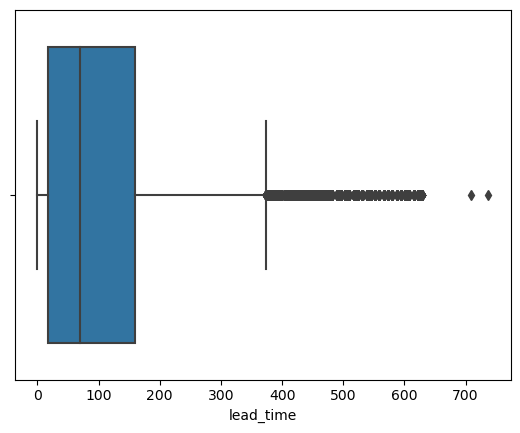

In [26]:
sns.boxplot(x=df['lead_time'])
plt.show()

In [27]:
# sns.histplot(df['adr'], bins=50)
# plt.title('Histogram of Average Daily Rate (ADR)')
# plt.show()

In [28]:
# Q1 = df['lead_time'].quantile(0.25)
# Q3 = df['lead_time'].quantile(0.75)
# Q1,Q3

In [29]:
# df['lead_time'].mean(), df['lead_time'].median(), df['lead_time'].std()

In [30]:
df.shape

(119390, 36)

### Outlier Handling

In [31]:
# lead time 
# lead time above 500 days is unrealistic
# So capping at 99th percentile to remove top 1% extreme outliers
lead_time_threshold = df['lead_time'].quantile(0.99)
df = df[df['lead_time'] <= lead_time_threshold]

In [32]:
#df['lead_time'].mean(),df['lead_time'].median()

In [33]:
# adr 
# handling negative and extreme adr 
df = df[(df['adr'] >= 0) & (df['adr'] <= df['adr'].quantile(0.99))]

In [34]:
df[df['Total Guests']==0][['total_staying_nights','Total Guests','adr','deposit_type','booking_changes','reservation_status','if_revenue_generated_from_booking','total_revenue']]


,total_staying_nights,Total Guests,adr,deposit_type,booking_changes,reservation_status,if_revenue_generated_from_booking,total_revenue
2224,3,0,0.00,No Deposit,1,Check-Out,1,0.00
2409,0,0,0.00,No Deposit,0,Check-Out,1,0.00
3181,3,0,0.00,No Deposit,0,Check-Out,1,0.00
3684,5,0,0.00,No Deposit,1,Check-Out,1,0.00
3708,6,0,0.00,No Deposit,1,Check-Out,1,0.00
...,...,...,...,...,...,...,...,...
115029,3,0,100.80,No Deposit,1,Check-Out,1,302.40
115091,1,0,0.00,No Deposit,0,Check-Out,1,0.00
116251,2,0,73.80,No Deposit,2,Check-Out,1,147.60
116534,7,0,22.86,No Deposit,1,Check-Out,1,160.02


In [35]:
# Data-entry error
# Remove data where Total Guests are 0.
df = df[df['Total Guests'] > 0]

### EDA

In [36]:
# Descriptive Statistics

# Get basic statistical details for numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_staying_nights,Total Guests,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,if_revenue_generated_from_booking,total_revenue
count,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,...,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000,116863.000000
mean,0.366985,100.412038,2016.147865,27.089181,15.776071,0.929610,2.499405,3.429015,1.959003,1.854941,...,0.031935,0.088753,0.139539,0.217648,2.264618,100.348945,0.061859,0.571575,0.750263,244.418416
std,0.481985,99.620490,0.707977,13.635100,8.782349,0.995536,1.903132,2.547263,0.707709,0.576913,...,0.175827,0.853179,1.512719,0.636517,16.636585,44.652001,0.244111,0.791523,0.432863,290.108836
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,68.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000,1.000000,177.000000
75%,1.000000,158.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,4.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,0.000000,1.000000,1.000000,342.000000
max,1.000000,444.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,69.000000,55.000000,55.000000,...,1.000000,26.000000,72.000000,18.000000,391.000000,252.000000,8.000000,5.000000,1.000000,7590.000000


### Booking Trends and Patterns



In [37]:
# To identify patterns in bookings over time.
# To understand seasonal trends.
# To compare bookings between hotel types.


In [38]:
# Booking By Month

# Convert 'arrival_date_month' to datetime format
month_mapping = {'January':1, 'February':2, 'March':3, 'April':4,
                 'May':5, 'June':6, 'July':7, 'August':8,
                 'September':9, 'October':10, 'November':11, 'December':12}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

In [39]:
df.insert(6,'arrival_date_month_num',df.pop('arrival_date_month_num'))

In [40]:
monthly_bookings = df.groupby('arrival_date_month_num')['hotel'].count().reset_index()

monthly_bookings.columns = ['Month No.','Bookings']

In [41]:
monthly_bookings

,Month No.,Bookings
0,1,5852
1,2,7976
2,3,9675
3,4,11041
4,5,11613
5,6,10842
6,7,12193
7,8,13002
8,9,10423
9,10,10952


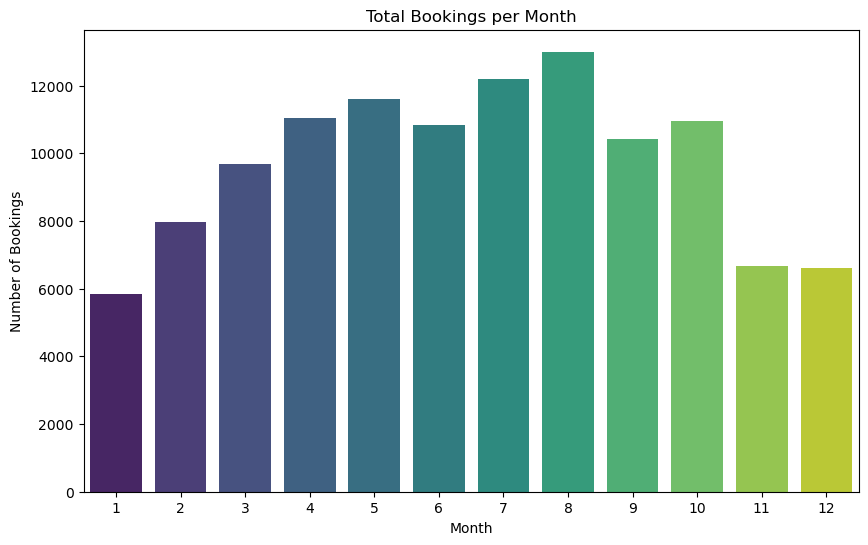

In [42]:
# Plot bookings per month
plt.figure(figsize=(10,6))
sns.barplot(x='Month No.', y='Bookings', data=monthly_bookings, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Total Bookings per Month')
plt.show()

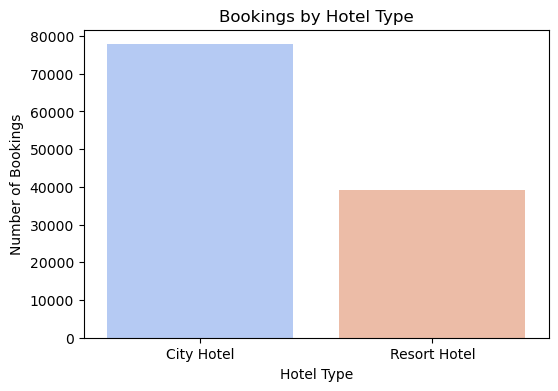

In [43]:
# Bookings per hotel type
hotel_bookings = df['hotel'].value_counts().reset_index()
hotel_bookings.columns = ['hotel', 'bookings']


# Plot bookings per hotel type
plt.figure(figsize=(6,4))
sns.barplot(x='hotel', y='bookings', data=hotel_bookings, palette='coolwarm')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Hotel Type')
plt.show()

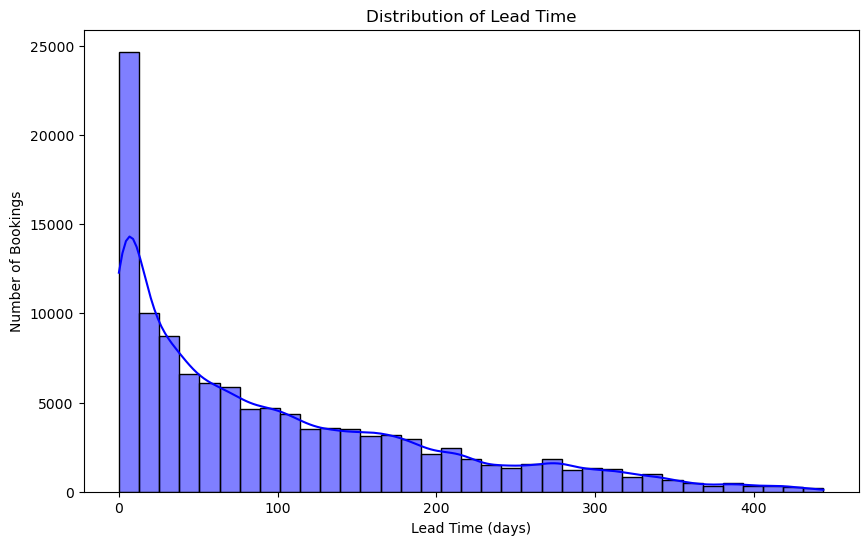

In [44]:
# Lead Time Distribution

# Plot distribution of lead time
plt.figure(figsize=(10,6))
sns.histplot(df['lead_time'], bins=35, kde=True, color='blue')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Lead Time')
plt.show()

### Cancellation Analysis

In [45]:
# To understand the cancellation rates.
# To identify factors contributing to cancellations.
# To help the hotel develop strategies to reduce cancellations.

In [46]:
# Overall Cancellation Rate
cancellation_rate = df['is_canceled'].mean()
print(f'Overall cancellation rate: {cancellation_rate:.2%}')


Overall cancellation rate: 36.70%


In [47]:
# hotel type Cancellation Rate 
hotel_type_cancel = df.groupby('hotel')['is_canceled'].mean()*100
hotel_type_cancel.round(decimals=2).astype(str)+'%'

hotel
City Hotel      41.32%
Resort Hotel    27.49%
Name: is_canceled, dtype: object

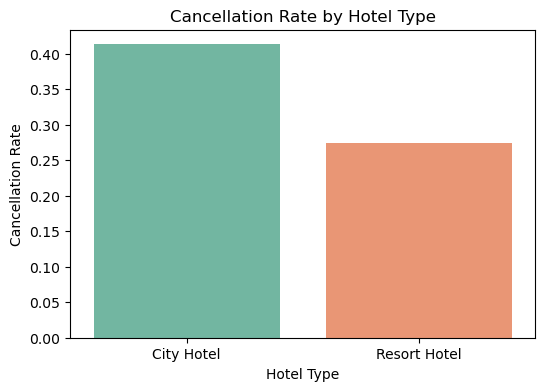

In [48]:
# Visualise Cancellation Rate by Hotel Type 
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

# Plot cancellation rate by hotel type
plt.figure(figsize=(6,4))
sns.barplot(x='hotel', y='is_canceled', data=cancel_by_hotel, palette='Set2')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Hotel Type')
plt.show()

### Revenue Analysis

In [49]:
# To analyze revenue patterns.
# To identify factors affecting revenue.
# To help optimize pricing and marketing strategies.

In [50]:
# Calculating Total Revenue

revenue_df = df[df['total_revenue']>0]
print(f"Total Revenue Generated: {revenue_df['total_revenue'].sum().round(2)}")

Total Revenue Generated: 28563469.34


In [51]:
revenue_df = revenue_df.groupby('hotel')['total_revenue'].sum().reset_index()

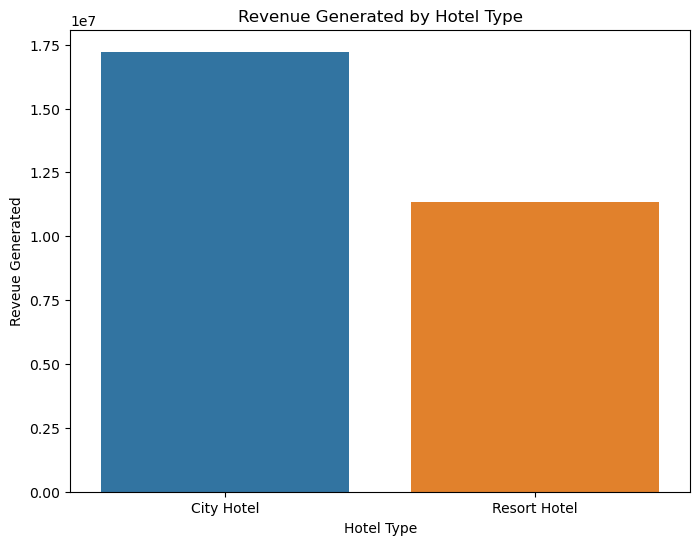

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x='hotel', y = 'total_revenue', data=revenue_df)
plt.xlabel('Hotel Type')
plt.ylabel('Reveue Generated')
plt.title('Revenue Generated by Hotel Type')
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116863 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   hotel                              116863 non-null  category      
 1   is_canceled                        116863 non-null  int64         
 2   lead_time                          116863 non-null  int64         
 3   arrival_date                       116863 non-null  datetime64[ns]
 4   arrival_date_year                  116863 non-null  int64         
 5   arrival_date_month                 116863 non-null  object        
 6   arrival_date_month_num             116863 non-null  int64         
 7   arrival_date_week_number           116863 non-null  int64         
 8   arrival_date_day_of_month          116863 non-null  int64         
 9   stays_in_weekend_nights            116863 non-null  int64         
 10  stays_in_week_nights

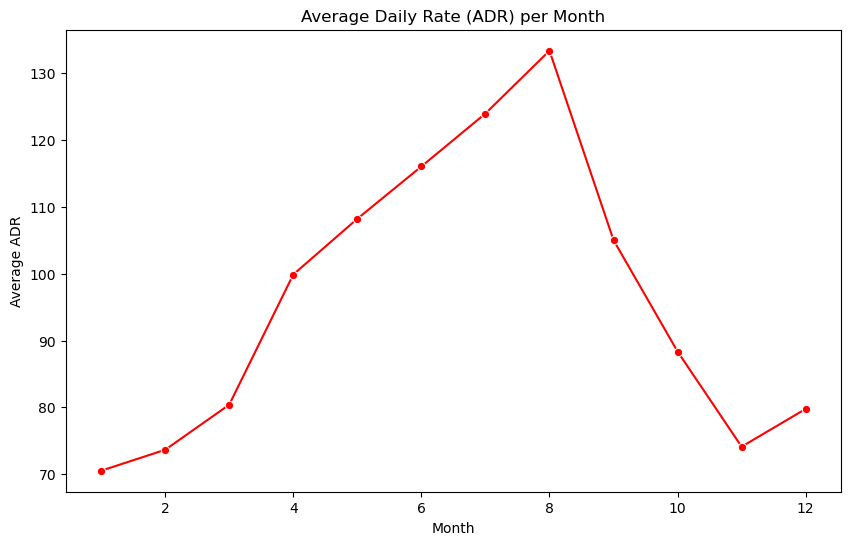

In [54]:
#  ADR Trends Over Time
monthly_adr = df.groupby('arrival_date_month_num')['adr'].mean().reset_index()


# Plot ADR per month
plt.figure(figsize=(10,6))
sns.lineplot(x='arrival_date_month_num', y='adr', data=monthly_adr, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.title('Average Daily Rate (ADR) per Month')
plt.show()

In [55]:
hotel_type_monthly_adr = df.groupby(['arrival_date_month_num','hotel'])['adr'].mean().reset_index()


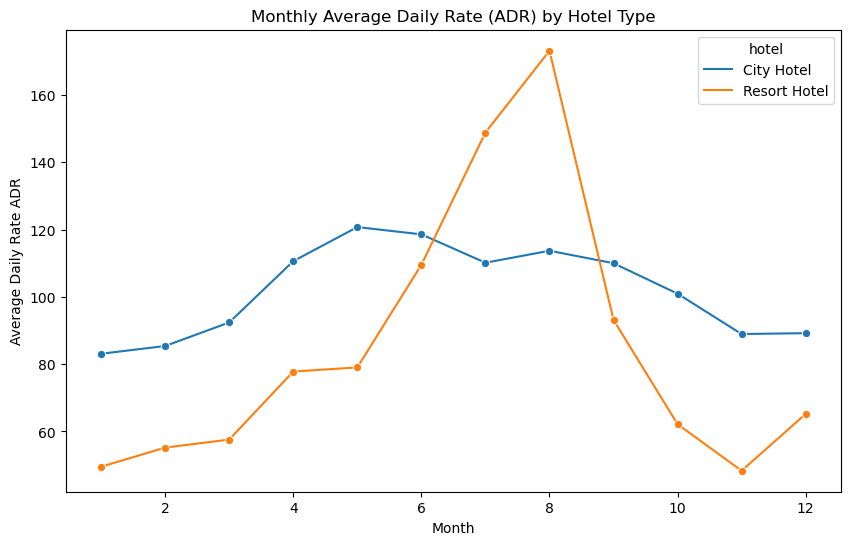

In [56]:
# Plot ADR per month
plt.figure(figsize=(10,6))
sns.lineplot(x='arrival_date_month_num', y='adr', data=hotel_type_monthly_adr,hue='hotel', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate ADR')
plt.title('Monthly Average Daily Rate (ADR) by Hotel Type')
plt.show()

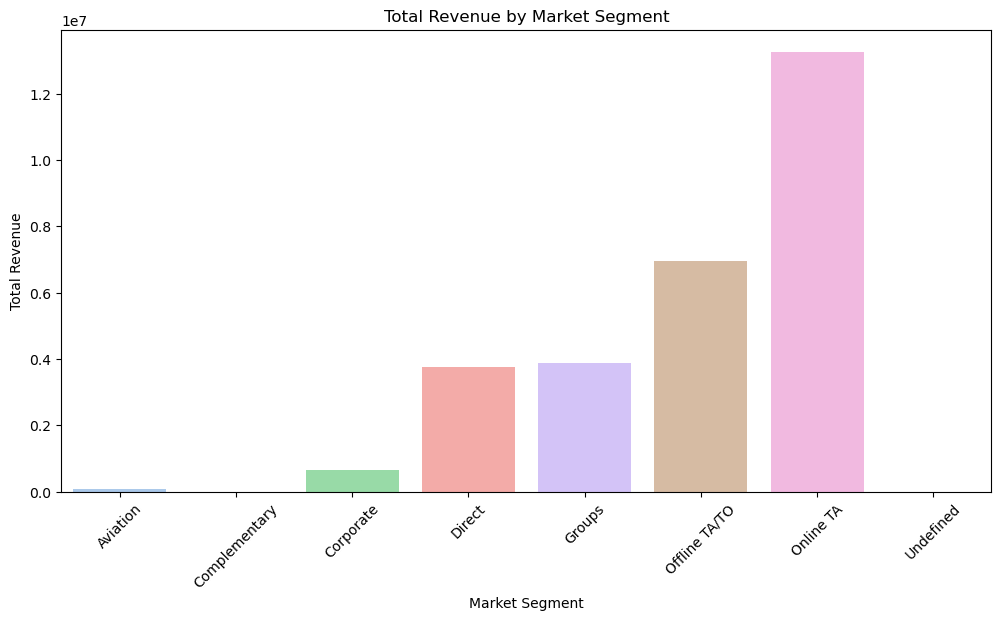

In [57]:
# Revenue by Market Segment

# Total revenue by market segment
revenue_by_segment = df.groupby('market_segment')['total_revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='market_segment', y='total_revenue', data=revenue_by_segment, palette='pastel')
plt.xlabel('Market Segment')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Market Segment')
plt.xticks(rotation=45)
plt.show()

### Customer Segmentation
	To understand different customer groups.
	To tailor marketing strategies.
	To improve customer satisfaction.

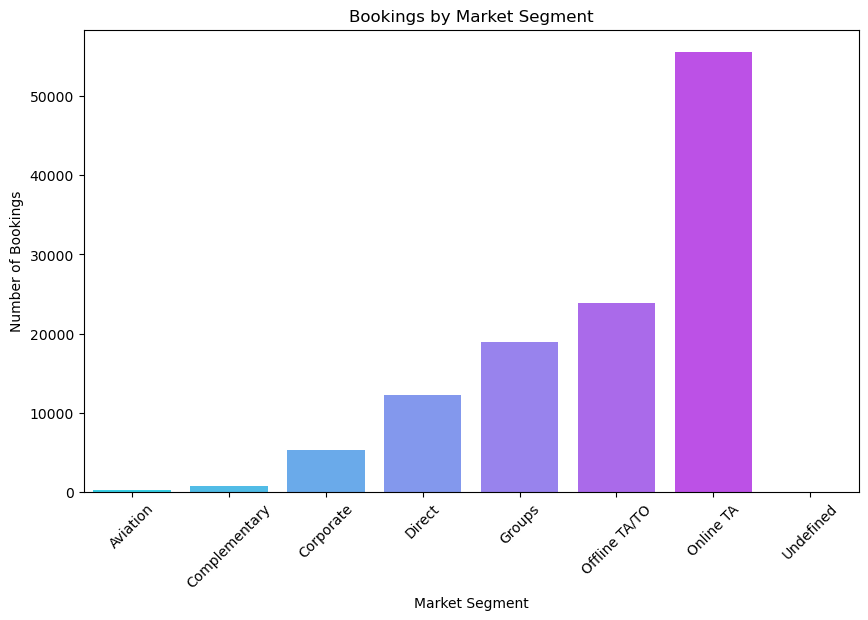

In [58]:
# Count of bookings by market segment
segment_counts = df['market_segment'].value_counts().reset_index()
segment_counts.columns = ['market_segment', 'bookings']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='market_segment', y='bookings', data=segment_counts, palette='cool')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Market Segment')
plt.xticks(rotation=45)
plt.show()

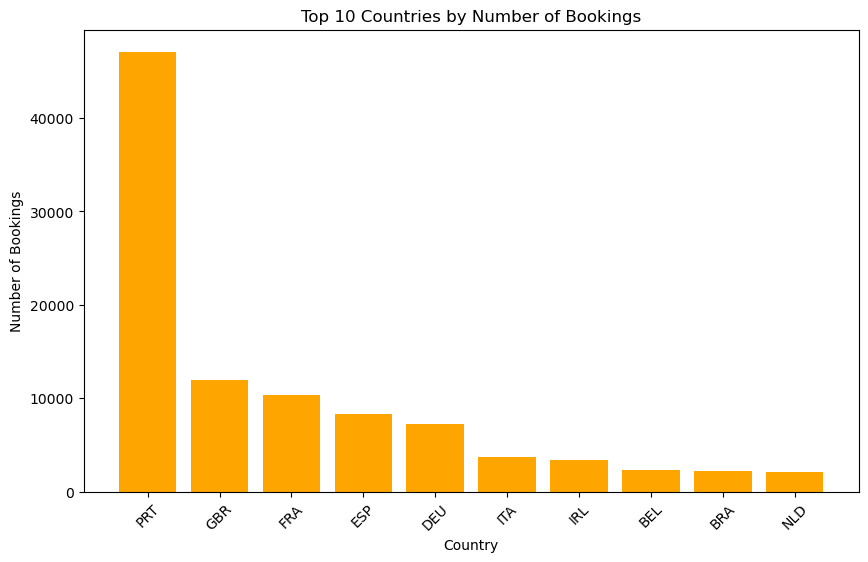

In [59]:
# Top 10 countries by number of bookings
top_booking_countries = df.groupby('country')['hotel'].count().sort_values(ascending=False).head(10).reset_index()
top_booking_countries.columns = ['country', 'bookings']
top_booking_countries

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_booking_countries['country'], top_booking_countries['bookings'], color='orange')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Countries by Number of Bookings')
plt.xticks(rotation=45)
plt.show()

0    96.806517
1     3.193483
Name: is_repeated_guest, dtype: float64


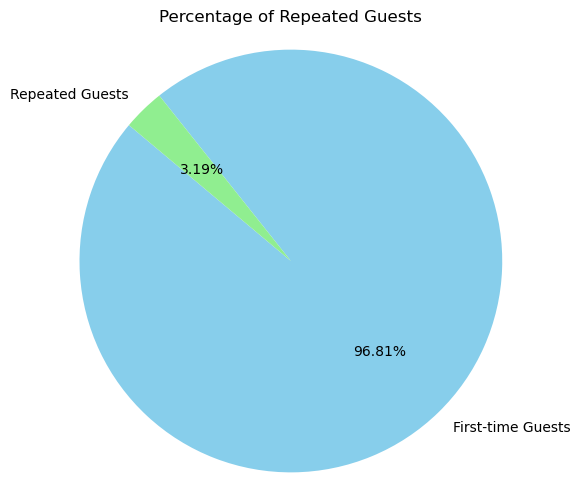

In [60]:
# Repeated Guests Analysis total
repeated_guest_counts = df['is_repeated_guest'].value_counts(normalize=True) * 100
print(repeated_guest_counts)

# Plot
plt.figure(figsize=(6,6))
labels = ['First-time Guests', 'Repeated Guests']
sizes = [repeated_guest_counts[0], repeated_guest_counts[1]]
colors = ['skyblue', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%',startangle=140)
plt.title('Percentage of Repeated Guests')
plt.axis('equal')
plt.show()

In [61]:
# Guest Repeated analysis on Hotel Type
repeated_bookings_df = (df.groupby(['hotel'])['is_repeated_guest'].value_counts(normalize=True)*100).round(2).astype(str)+'%'
repeated_bookings_df.iloc[1:4:2]


hotel         is_repeated_guest
City Hotel    1                    2.54%
Resort Hotel  1                     4.5%
Name: is_repeated_guest, dtype: object

### Correlation Analysis

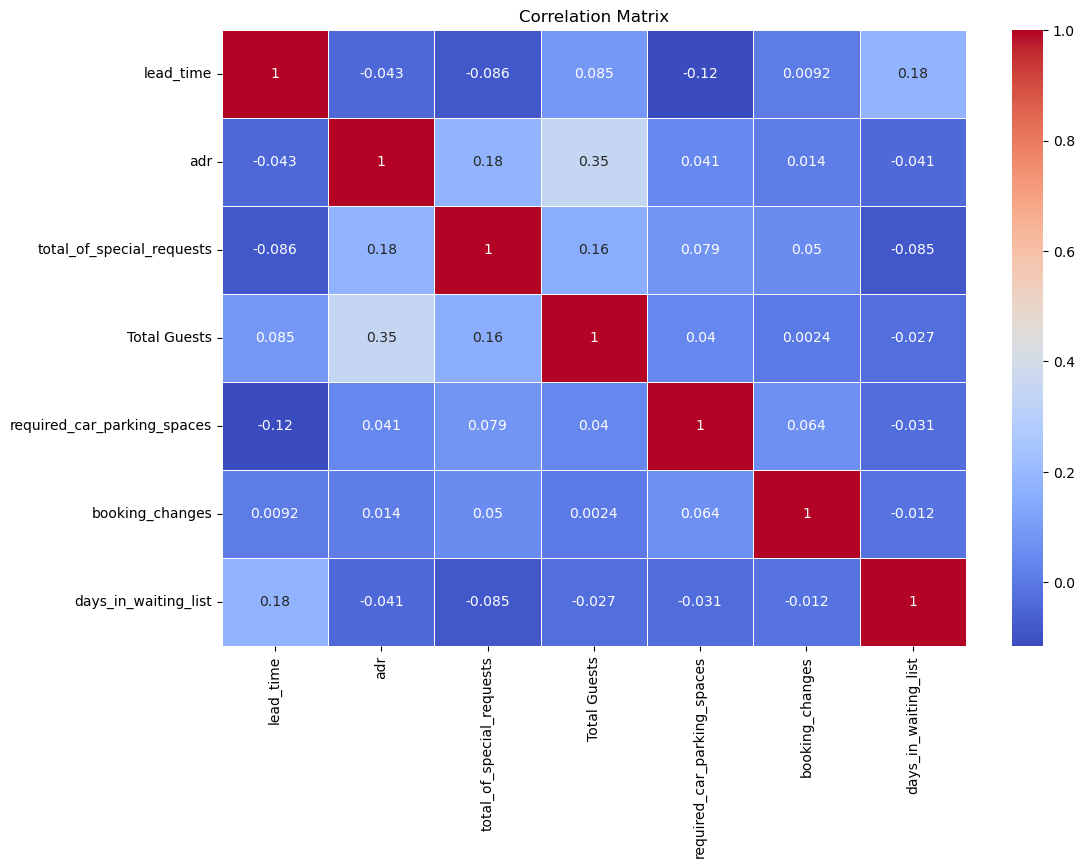

In [62]:

numeric_cols = ['lead_time', 'adr', 'total_of_special_requests', 'Total Guests', 'required_car_parking_spaces', 'booking_changes', 'days_in_waiting_list']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### Time-Series Analysis

Purpose:

	•	To analyze booking patterns over time.

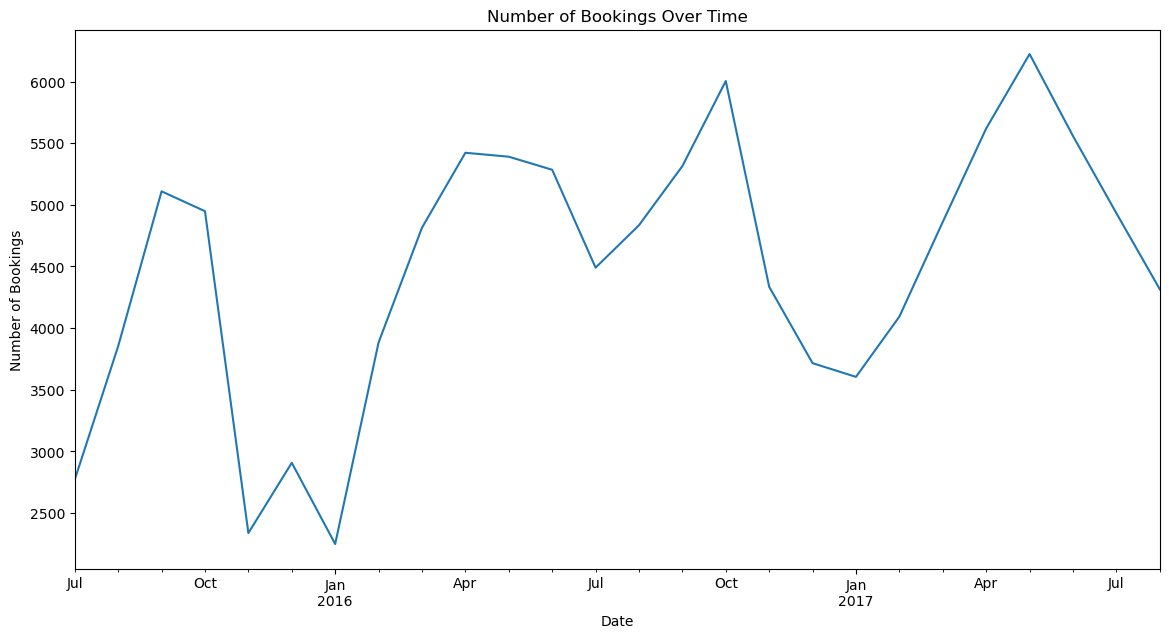

In [63]:
# Bookings Over Time
#df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Set 'arrival_date' as the index
df = df.set_index('arrival_date')

# Resample bookings per month
monthly_bookings = df['hotel'].resample('M').count()

# Plot
plt.figure(figsize=(14, 7))
monthly_bookings.plot()
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Over Time')
plt.show()

### Visualizations

Purpose:

	•To communicate findings effectively.
	•To support insights with graphical representations.
	•To make data accessible and understandable.

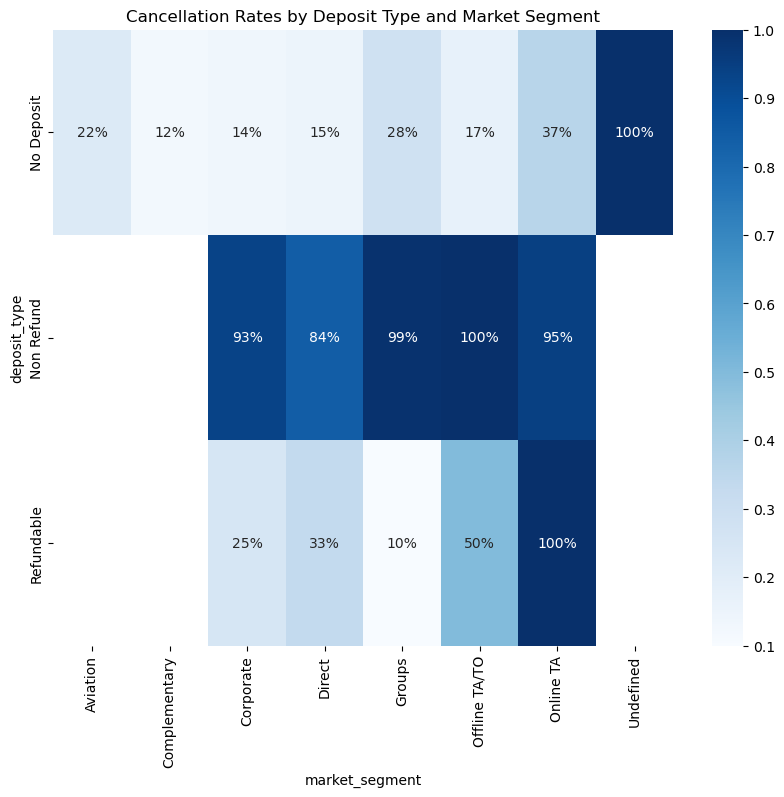

In [64]:
# Heatmap of Cancellations by Lead Time and Deposit Type
pivot_df = df.pivot_table(values='is_canceled', index='deposit_type', columns='market_segment',aggfunc='mean')

# plot
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df,annot=True,cmap='Blues',fmt='.0%')
plt.title('Cancellation Rates by Deposit Type and Market Segment')
plt.show()

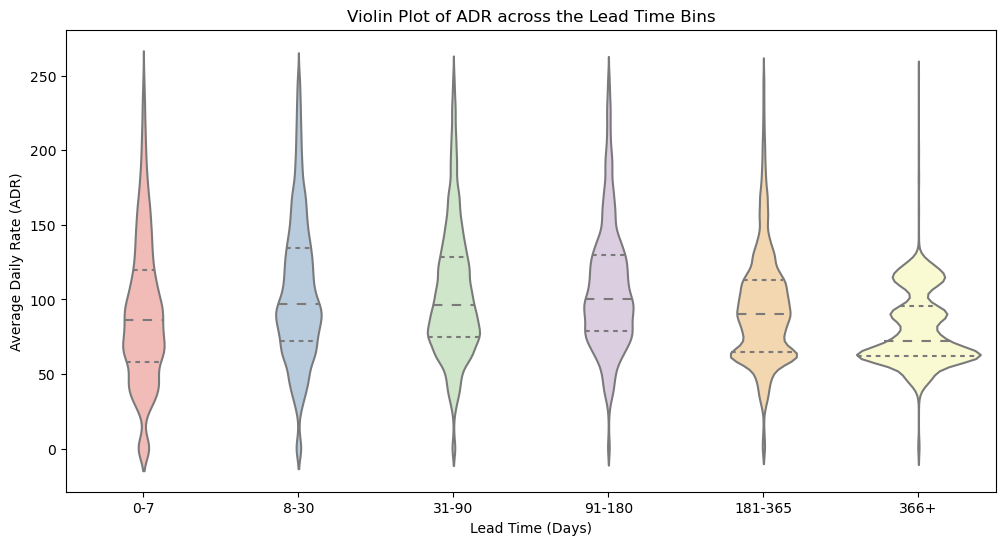

In [65]:
# Scatter Plot of ADR vs. Lead Time
# lead_time bins
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=[0, 7, 30, 90, 180, 365, df['lead_time'].max()], 
                              labels=['0-7', '8-30', '31-90', '91-180', '181-365', '366+'])

# plot
plt.figure(figsize=(12,6))
sns.violinplot(x='lead_time_bins', y='adr', data=df, inner='quartile', palette='Pastel1')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Violin Plot of ADR across the Lead Time Bins')
plt.show()


In [66]:


df.to_csv('/Users/shraddheysatpute/Documents/Data Analyst/Projects/Hotel_Booking_Demand_Analysis/Others/modified_csv.csv', index=False)




In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116863 entries, 2015-07-01 to 2017-08-29
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   hotel                              116863 non-null  category      
 1   is_canceled                        116863 non-null  int64         
 2   lead_time                          116863 non-null  int64         
 3   arrival_date_year                  116863 non-null  int64         
 4   arrival_date_month                 116863 non-null  object        
 5   arrival_date_month_num             116863 non-null  int64         
 6   arrival_date_week_number           116863 non-null  int64         
 7   arrival_date_day_of_month          116863 non-null  int64         
 8   stays_in_weekend_nights            116863 non-null  int64         
 9   stays_in_week_nights               116863 non-null  int64         
 10  tota